In [1]:
import pandas as pd

# data loading (train data set loading)
train_df = pd.read_csv("./data/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.shape
train_df.info()   # 각 column(feature)의 상세정보를 출력
# cabin null너무 많아서 유의하지 않을거같아
train_df.isnull().sum(axis=0) # 행방향으로 sum
# 결측치와 이상치를 찾아서 적절한 값으로 변경하던가
# 아니면 삭제하던가 처리를 해야해요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
def stackedBarChart(feature):
    survived = train_df.loc[train_df["Survived"]==1][feature].value_counts()
    survived.name = "Survived"
    survived

    dead = train_df.loc[train_df["Survived"]==0][feature].value_counts()
    dead.name = "Dead"
    dead

    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind = "bar", stacked=True) 
    

In [4]:
train_df.head()
# text로 되어있는 부분은 machine learning하기가 힘들다
# text로 되어있는 부분은 적절한 scale의 숫자로 변환
# NaN(결측치)는 삭제하는 것보다는 적절한 값으로 대체
# 정규식 이용


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Name은 그 자체로는 크게 의미가 없어보이지만 이름의 특정 keyword가 들어가 있고
# 이 keyword가 생존에 영향을 미칠 수 있다
# train_df["Name"].str.extract("정규식")
train_df["Title"] = train_df["Name"].str.extract("([A-Za-z]+)\.")
# 문자열을 가져와서 추출할건데 패턴이있어 (정규식)
# + : 한개 이상
# \ escape시켜서 . 자체를 뽑고 싶어
# 새로운 컬럼
train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Lady          1
Ms            1
Don           1
Sir           1
Countess      1
Capt          1
Mme           1
Name: Title, dtype: int64

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


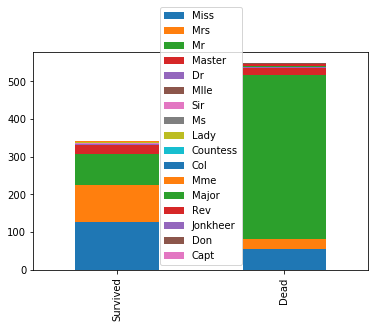

In [6]:
stackedBarChart("Title")
# 너무 많아서 4개로만
# Title 안에 Mr, Miss, Mrs, other를 각각 0,1,2,3으로 변환
title_mapping_dict = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3,
                      "Mlle" : 3, "Major" : 3,"Col" : 3,"Countess" : 3,"Capt" : 3,"Sir" : 3,"Lady" : 3,
                      "Jonkheer" : 3,"Don" : 3,"Mme" : 3,"Ms" : 3}

train_df["Title"] = train_df["Title"].map(title_mapping_dict)
train_df
#stackedBarChart("Title")
train_df.drop("Name", axis = 1, inplace=True)   # 원본에서 컬럼을 삭제하겠다
train_df.drop("Ticket", axis = 1, inplace=True)
train_df.drop("Cabin", axis = 1, inplace=True)
train_df

In [7]:
# 성별 column에 대해 male => 0, female => 1 로 변환
sex_mapping_dict = {"male" : 0, "female" : 1}
train_df["Sex"]= train_df["Sex"].map(sex_mapping_dict)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S,3
887,888,1,1,1,19.0,0,0,30.0000,S,1
888,889,0,3,1,NaN,1,2,23.4500,S,1
889,890,1,1,0,26.0,0,0,30.0000,C,0


In [8]:
# 탑승지역의 결측치를 "S"로 대체 (S에서 가장많이 탔어)
train_df["Embarked"].fillna("S", inplace=True)
# 탑승지역 column에 대해 S => 0, Q => 1. C => 2 로 변환
embarked_mapping_dict = {"S" : 0, "Q" : 1, "C" : 2}
train_df["Embarked"]= train_df["Embarked"].map(embarked_mapping_dict)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,2,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,3
887,888,1,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,1,NaN,1,2,23.4500,0,1
889,890,1,1,0,26.0,0,0,30.0000,2,0


In [9]:
# Age에는 결측치가 많아요!
# 결측치를 대체해서 채워넣어야해요!
# - 전체 사람의 평균을 구해서 결측치를 채워요
# - Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다.
# 이건 한번 해보세요
age_mean = train_df.groupby("Title")["Age"].mean()
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0])
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
train_df["Age"]=result_series.sort_index()
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.000000,1,0,7.2500,0,0
1,2,1,1,1,38.000000,1,0,71.2833,2,2
2,3,1,3,1,26.000000,0,0,7.9250,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,2
4,5,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,3
887,888,1,1,1,19.000000,0,0,30.0000,0,1
888,889,0,3,1,21.773973,1,2,23.4500,0,1
889,890,1,1,0,26.000000,0,0,30.0000,2,0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,0,0
1,2,1,1,1,1.0,1,0,71.2833,2,2
2,3,1,3,1,1.0,0,0,7.9250,0,1
3,4,1,1,1,1.0,1,0,53.1000,0,2
4,5,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1.0,0,0,13.0000,0,3
887,888,1,1,1,0.0,0,0,30.0000,0,1
888,889,0,3,1,1.0,1,2,23.4500,0,1
889,890,1,1,0,1.0,0,0,30.0000,2,0


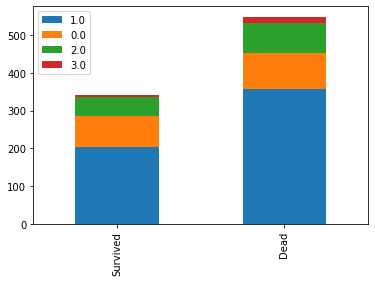

In [10]:
# Age 에 대해서 Binning 처리
# Binning처리를 할 때 고려해야 할 사항 => 간격을 어떻게 설정?
# Age => 0~20 : 0
# Age => 20초과~40이하 : 1
# Age => 40초과~60이하 : 2
# Age => 60초과 : 3

train_df.loc[train_df["Age"] <= 20, "Age"] = 0
train_df.loc[(train_df["Age"] > 20) & (train_df["Age"] <= 40), "Age"] = 1
train_df.loc[(train_df["Age"] > 40) & (train_df["Age"] <= 60), "Age"] = 2
train_df.loc[train_df["Age"] > 60, "Age"] = 3
# loc[행, 열]

stackedBarChart("Age")
train_df

7.9104 14.4542 31.0


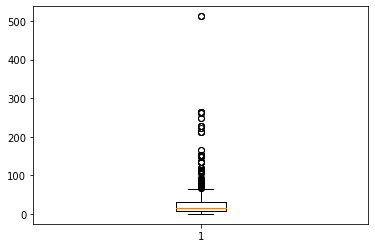

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# Fare까지 Binning처리를 해보아요
# 모든 전처리가 끝나게 되요!
plt.boxplot(train_df["Fare"])
q1,q2,q3 = np.percentile(train_df["Fare"],[25,50,75])
print(q1,q2,q3)

7.9104 14.4542 31.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,1.0,1,0,3.0,2,2
2,1,3,1,1.0,0,0,0.0,0,1
3,1,1,1,1.0,1,0,2.0,0,2
4,0,3,0,1.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,0.0,0,3
887,1,1,1,0.0,0,0,1.0,0,1
888,0,3,1,1.0,1,2,1.0,0,1
889,1,1,0,1.0,0,0,1.0,2,0


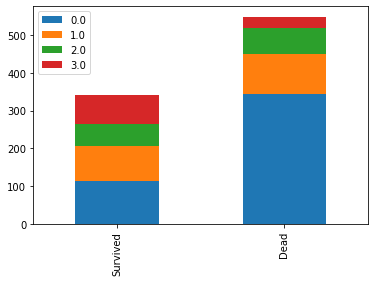

In [12]:
q1,q2,q3 = np.percentile(train_df["Fare"],[25,50,75])
print(q1,q2,q3)

train_df.loc[train_df["Fare"] <= 15, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 15) & (train_df["Fare"] <= 30), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 30) & (train_df["Fare"] <= 70), "Fare"] = 2
train_df.loc[train_df["Fare"] > 70, "Fare"] = 3

train_df.drop("PassengerId",axis=1, inplace=True)
stackedBarChart("Fare")
train_df

### Machine Learning으로 들어가자~
- Logistic regression을 Tensorflow를 이용해서 구현해 보자

In [ ]:
import tensorflow as tf

# data set을 준비해야 한다
# 정확도를 측정하기 위해서 학습용 데이터와 평가용 데이터를 따로 분리해야 한다
# train_df를 살짝 분리해서 학습용 데이터와 평가용 데이터를 생성

# 학습용 8 평가용 2  / 평가용 8 평가용 2
# 데이터의 편중이 발생할 수 있어

# 편향이 발생할 수 있으니 (n fold cross validatation) 교차 검증
# 10개로 쪼갠다음 9를 학습 1을 평가
# 첫번째는 맨밑에 것이 평가데이터
# 두번째는 밑에서 두번째가 평가데이터
# 세번째는 밑에서 두번째가 평가데이터
# ,,,,

# 우리는 8:2 하자
# 위에서 80%를 학습용데이터로 하위 20%를 평가용 데이터로 사용
train_df.shape
train_num = int(train_df.shape[0] * 0.8)    #712
train_num
test_num = train_df.shape[0] - train_num

# train data set
# 원래는 이렇게 시작: x_data = 
train_x_data = train_df.drop("Survived",axis=1, inplace = False)[:train_num].values


test_x_data = train_df.drop("Survived",axis=1, inplace = False)[train_num:].values
display(train_df)

train_y_data  = train_df["Survived"][:train_num].values.reshape([-1,1])
test_y_data  = train_df["Survived"][train_num:].values.reshape([-1,1])

# tensorflow를 이용한 logistic regression code가 나오면 된다
# placeholder : 입력데이터를 받아들이는 입력 파라메타
X = tf.placeholder(shape = [None, 8], dtype=tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([8,1]), name = "weight")
# x에 대한 column, y에 대한 column
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)  # 지수함수를 이용하기 위해서 S모양

# Cost(Loss) function
# linear 최소제곱법 이용해서 cost구함
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,labels = Y))

# train함수
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
# 특정 learning rate를 통해 최적의cost
train = optimizer.minimize(cost)

# session, 초기화
# runner가 필요해 , 초기화 작업 진행되야해
sess= tf.Session()
sess.run(tf.global_variables_initializer())

# nodes드륻었더니 학습 ㄱㄱ
for step in range(3000): #  코스트값을 3000번 줄이겠다 는 뜻
    _, cost_val=sess.run([train, cost], feed_dict = {X : train_x_data,
                                                     Y : train_y_data} ) # 먹이를 줘야지 그데이터가지고 학습해 
    if step % 300 == 0:
        print("Cost값은 : {}".format(cost_val))
        
# 우리가 원하는 W와 b를 구했다! => 모델을 구성했다
# 정확도를 측정
# 테스트용 x 입력데이터(test_x_data)를 넣어서 예측을 해요!
# 이렇게 구한 예측값과 y입력데이터(test_y_data)를 비교해요
# 예측값과 실제데이터의 차이를 비율로 계산해보자

predict = tf.cast(H > 0.5, dtype = tf.float32)
# 예측값
# 1에 가까울 확률이 나오게 됨
# 기준점 잡아줘야해 얼마가 나올거냐
# t,f 놓은 이유 -> 0과 1 둘중의 하나의 값으로 변환시켜주기위해
# 예측값과 실제 값과 비교를위해
# predict = tf.equal(predict, Y)
correct = tf.equal(predict, Y)
# 같니?
# t/f
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32)) # 0101가지고 평균 몇퍼센트냐
print("정확도:{}". format(sess.run(accuracy,
                                feed_dict = {X : test_x_data,
                                             Y : test_y_data})))

# 학습 끝났어
# kaggle에서 제공한 test.csv파일이 있어요!
# test.csv를 이용해서 prediction을 해야해요
# 예측결과가 나와요! => 파일로 만들어서 제출

# test.csv를 살펴보면 train.csv와 같아요
# 결측치처리 ...똑같이 처리해야해
# test.csv도 accuracy를 구할 수 있는 형태로 feature enginneering을 해야해


In [13]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import warnings
train_num = int(train_df.shape[0] * 0.8)    #712
train_num
test_num = train_df.shape[0] - train_num

# train data set
# 원래는 이렇게 시작: x_data = 
train_x_data = train_df.drop("Survived",axis=1, inplace = False)[:train_num].values
test_x_data = train_df.drop("Survived",axis=1, inplace = False)[train_num:].values

train_y_data  = train_df["Survived"][:train_num].values.reshape([-1,1])
test_y_data  = train_df["Survived"][train_num:].values.reshape([-1,1])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,1.0,1,0,3.0,2,2
2,1,3,1,1.0,0,0,0.0,0,1
3,1,1,1,1.0,1,0,2.0,0,2
4,0,3,0,1.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,0.0,0,3
887,1,1,1,0.0,0,0,1.0,0,1
888,0,3,1,1.0,1,2,1.0,0,1
889,1,1,0,1.0,0,0,1.0,2,0


In [ ]:
# 그래프 초기화
tf.reset_default_graph()

# placeholder
X = tf.placeholder(shape = [None,8], dtype=tf.float32)
Y = tf.placeholder(shape = [None,1], dtype=tf.float32)

# Weight & bias(Deep & Wide)
W1 = tf.get_variable("weight1", shape=[8,256],
                    initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
# depth가 이깊으로면깊을수록 연상이 안돼
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
 
W2 = tf.get_variable("weight2", shape=[256,256],
                    initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
 
W3 = tf.get_variable("weight3", shape=[256,1],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]), name="bias3")


# Hypothesis
logit= tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logit)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y)) 

# train
train = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cost)   

# session chrlghk
sess=tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
# num_of_epoch = 500   #반복횟수
# batch_size = 100

# for step in range(num_of_epoch):
#     num_of_iter = int(train_num/batch_size)
#     cost_val=0
                      
#     for i in range(num_of_iter):
#         batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
#         batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
#         _,cost_val = sess.run([train,cost],
#                              feed_dict={X:batch_x,
#                                         Y:batch_y})
#     if step%5 ==0:
#         print("cost:{}".format(cost_val))


for step in range(3000): #  코스트값을 3000번 줄이겠다 는 뜻
    _, cost_val=sess.run([train, cost], feed_dict = {X : train_x_data,
                                                     Y : train_y_data} ) # 먹이를 줘야지 그데이터가지고 학습해 
    if step % 300 == 0:
        print("Cost값은 : {}".format(cost_val))

# test로 해보자~!

In [ ]:
import pandas as pd

# data loading (train data set loading)
test_df = pd.read_csv("./data/titanic/test.csv")
test_df.head()

In [ ]:
test_df.shape
test_df.info()   # 각 column(feature)의 상세정보를 출력
# cabin null너무 많아서 유의하지 않을거같아
test_df.isnull().sum(axis=0) # 행방향으로 sum
# 결측치와 이상치를 찾아서 적절한 값으로 변경하던가
# 아니면 삭제하던가 처리를 해야해요

In [ ]:
# Name은 그 자체로는 크게 의미가 없어보이지만 이름의 특정 keyword가 들어가 있고
# 이 keyword가 생존에 영향을 미칠 수 있다
# train_df["Name"].str.extract("정규식")
test_df["Title"] = test_df["Name"].str.extract("([A-Za-z]+)\.")
# 문자열을 가져와서 추출할건데 패턴이있어 (정규식)
# + : 한개 이상
# \ escape시켜서 . 자체를 뽑고 싶어
# 새로운 컬럼
test_df["Title"].value_counts()

In [ ]:
# 너무 많아서 4개로만
# Title 안에 Mr, Miss, Mrs, other를 각각 0,1,2,3으로 변환
title_mapping_dict = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3,
                      "Mlle" : 3, "Major" : 3,"Col" : 3,"Countess" : 3,"Capt" : 3,"Sir" : 3,"Lady" : 3,
                      "Jonkheer" : 3,"Dona" : 3,"Mme" : 3,"Ms" : 3}

test_df["Title"] = test_df["Title"].map(title_mapping_dict)
test_df
#stackedBarChart("Title")
test_df.drop("Name", axis = 1, inplace=True)   # 원본에서 컬럼을 삭제하겠다
test_df.drop("Ticket", axis = 1, inplace=True)
test_df.drop("Cabin", axis = 1, inplace=True)
test_df

In [ ]:
# 성별 column에 대해 male => 0, female => 1 로 변환
sex_mapping_dict = {"male" : 0, "female" : 1}
test_df["Sex"]= test_df["Sex"].map(sex_mapping_dict)
test_df

In [ ]:
# 탑승지역의 결측치를 "S"로 대체 (S에서 가장많이 탔어)
test_df["Embarked"].fillna("S", inplace=True)
# 탑승지역 column에 대해 S => 0, Q => 1. C => 2 로 변환
embarked_mapping_dict = {"S" : 0, "Q" : 1, "C" : 2}
test_df["Embarked"]= test_df["Embarked"].map(embarked_mapping_dict)
test_df

In [ ]:
# Age에는 결측치가 많아요!
# 결측치를 대체해서 채워넣어야해요!
# - 전체 사람의 평균을 구해서 결측치를 채워요
# - Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채운다.
# 이건 한번 해보세요
age_mean = test_df.groupby("Title")["Age"].mean()
a = test_df[test_df["Title"]==0]["Age"].fillna(age_mean[0])
b = test_df[test_df["Title"]==1]["Age"].fillna(age_mean[1])
c = test_df[test_df["Title"]==2]["Age"].fillna(age_mean[2])
d = test_df[test_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
test_df["Age"]=result_series.sort_index()
test_df

In [ ]:
# Age 에 대해서 Binning 처리
# Binning처리를 할 때 고려해야 할 사항 => 간격을 어떻게 설정?
# Age => 0~20 : 0
# Age => 20초과~40이하 : 1
# Age => 40초과~60이하 : 2
# Age => 60초과 : 3

test_df.loc[test_df["Age"] <= 20, "Age"] = 0
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"] <= 40), "Age"] = 1
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"] <= 60), "Age"] = 2
test_df.loc[test_df["Age"] > 60, "Age"] = 3
# loc[행, 열]


test_df

In [ ]:
#test_df.dropna(inplace=True)

import matplotlib.pyplot as plt
import numpy as np
test_df["Fare"].fillna(test_df["Fare"].mean(),inplace=True)
q1,q2,q3 = np.percentile(test_df["Fare"],[25,50,75])
print(q1,q2,q3)
test_df.isnull().sum(axis=0)

plt.boxplot(test_df["Fare"])

In [ ]:
test_df.loc[test_df["Fare"] <= 15 , "Fare"] = 0
test_df.loc[(test_df["Fare"] > 15) & (test_df["Fare"] <= 30), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 30) & (test_df["Fare"] <= 70), "Fare"] = 2
test_df.loc[train_df["Fare"] > 70, "Fare"] = 3


# test_df.loc[test_df["Fare"] <= 100, "Fare"] = 0
# test_df.loc[(test_df["Fare"] > 100) & (test_df["Fare"] <= 200), "Fare"] = 1
# test_df.loc[(test_df["Fare"] > 200) & (test_df["Fare"] <= 300), "Fare"] = 2
# test_df.loc[train_df["Fare"] > 300, "Fare"] = 3

#test_df.drop("PassengerId",axis=1, inplace=True)

# 7.9104 14.4542 31.0

passengerid=test_df['PassengerId']

test_df.drop("PassengerId",axis=1, inplace=True)

In [ ]:
test_df.isnull().sum(axis=0)

In [ ]:
int(test_df.shape[0] * 0.8) 

In [ ]:
import tensorflow as tf

# data set을 준비해야 한다
# 정확도를 측정하기 위해서 학습용 데이터와 평가용 데이터를 따로 분리해야 한다
# train_df를 살짝 분리해서 학습용 데이터와 평가용 데이터를 생성

# 학습용 8 평가용 2  / 평가용 8 평가용 2
# 데이터의 편중이 발생할 수 있어

# 편향이 발생할 수 있으니 (n fold cross validatation) 교차 검증
# 10개로 쪼갠다음 9를 학습 1을 평가
# 첫번째는 맨밑에 것이 평가데이터
# 두번째는 밑에서 두번째가 평가데이터
# 세번째는 밑에서 두번째가 평가데이터
# ,,,,

# 우리는 8:2 하자
# 위에서 80%를 학습용데이터로 하위 20%를 평가용 데이터로 사용


# train data set
# 원래는 이렇게 시작: x_data = 
train_x_data = train_df.drop("Survived",axis=1, inplace = False).values
train_y_data  = train_df["Survived"].values.reshape([-1,1])


# tensorflow를 이용한 logistic regression code가 나오면 된다
# placeholder : 입력데이터를 받아들이는 입력 파라메타
X = tf.placeholder(shape = [None, 8], dtype=tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([8,1]), name = "weight")
# x에 대한 column, y에 대한 column
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)  # 지수함수를 이용하기 위해서 S모양
# linear가 아ㅣㄴ라 logistic이라서 시그모이드를 씌움

# Cost(Loss) function
# linear 최소제곱법 이용해서 cost구함
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,labels = Y))

# train함수
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
# 특정 learning rate를 통해 최적의cost
train = optimizer.minimize(cost)

# session, 초기화
# runner가 필요해 , 초기화 작업 진행되야해
sess= tf.Session()
sess.run(tf.global_variables_initializer())

# nodes드륻었더니 학습 ㄱㄱ
for step in range(3000): #  코스트값을 3000번 줄이겠다 는 뜻
    _, cost_val=sess.run([train, cost], feed_dict = {X : train_x_data,
                                                     Y : train_y_data} ) # 먹이를 줘야지 그데이터가지고 학습해 
    if step % 300 == 0:
        print("Cost값은 : {}".format(cost_val))
        
# 우리가 원하는 W와 b를 구했다! => 모델을 구성했다
# 정확도를 측정
# 테스트용 x 입력데이터(test_x_data)를 넣어서 예측을 해요!
# 이렇게 구한 예측값과 y입력데이터(test_y_data)를 비교해요
# 예측값과 실제데이터의 차이를 비율로 계산해보자

predict = tf.cast(H > 0.5, dtype = tf.float32)
# 예측값
# 1에 가까울 확률이 나오게 됨
# 기준점 잡아줘야해 얼마가 나올거냐
# t,f 놓은 이유 -> 0과 1 둘중의 하나의 값으로 변환시켜주기위해
# 예측값과 실제 값과 비교를위해
# predict = tf.equal(predict, Y)
correct = tf.equal(predict, Y)
# 같니?
# t/f
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32)) # 0101가지고 평균 몇퍼센트냐
print("정확도:{}". format(sess.run(accuracy,
                                feed_dict = {X : test_x_data,
                                             Y : test_y_data})))

# 학습 끝났어
# kaggle에서 제공한 test.csv파일이 있어요!
# test.csv를 이용해서 prediction을 해야해요
# 예측결과가 나와요! => 파일로 만들어서 제출

# test.csv를 살펴보면 train.csv와 같아요
# 결측치처리 ...똑같이 처리해야해
# test.csv도 accuracy를 구할 수 있는 형태로 feature enginneering을 해야해


In [ ]:
x_data = test_df.values
H_result = sess.run(H, feed_dict={X:x_data})
predict = tf.cast(H_result > 0.5, dtype = tf.int32)
result = sess.run(predict)

datafm=pd.DataFrame(result, columns=['Survived']) 
datafm
#t_df = pd.read_csv("./data/titanic/test.csv")
#pid=t_df["PassengerId"]

Pid=pd.DataFrame(passengerid, columns=["PassengerId"])
Pid

dd=pd.concat([Pid,datafm], axis=1)
dd
dd.to_csv("gender_submission.csv",index=False)
display(dd)

In [ ]:
Pid=pd.DataFrame(passengerid, columns=["PassengerId"])
Pid

In [ ]:
from sklearn.linear_model import LogisticRegression
    
model = LogisticRegression()
myModel = model.fit(train_x_data,train_y_data)   # 학습끝
result = myModel.predict(test_x_data)